# import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  import dataset

In [2]:
dataset = pd.read_csv('datasets/Restaurant_reviews.tsv' , delimiter= '\t', quoting = 3)
#remove the double inverted quotes from the dataset while importing which is done by keeping quoting=3
print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


# clean our dataset (removing punctuations,stopwords,convert to single case, special characters, etc)

In [3]:
import re
import nltk
#nltk.download('stopwords') #remove unnecessary words like the,was which dont add to the meaning of line.
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] #whichcwill contain the cleaned reviews
for i in range(0,1000):
    review =re.sub('[^a-zA-Z]',' ',dataset['Review'][i])# we are subsbtituting all punctuations with white space one by one
    #^a-zA-Z means except lower n upper alphabets we remove punctuations marks with space
    review =review.lower() # converting the review into lower case
    review =review.split() #converting our statement into list of words
    ps=PorterStemmer()# applying stemming on the list of words
    all_stopwords = stopwords.words('english') #will collect all the stopwords
    all_stopwords.remove('not') #removed 'not' from the stopword
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)] #in-line for loop, word is a variable which
    #will contain all the words from review list one by one
    #if n only if word is not present in the stopword will it be allowed to pass on the object of the stemmer class
    review =' '.join(review) # joining all words of  the review list back together to create the 
    corpus.append(review)
    
    
    

[nltk_data] Downloading package stopwords to C:\Users\Ankit
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
corpus[0:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

# create bag of words

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) #removing further unnecessary words like bank,holiday,etcc
#while creating the object of the countvectorizer class we need to input one important parameter and that 
#parameter is max_features which decided after we get the total no of columns
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values
len(x[0])

1500

# NLP DONE 
# Now creating svm model

# split x and y into training and test data

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


# create and train SVM model

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# predicting the output

In [11]:
y_pred=classifier.predict(x_test)

# check the accuracy and plot the confusion matrix

0.79


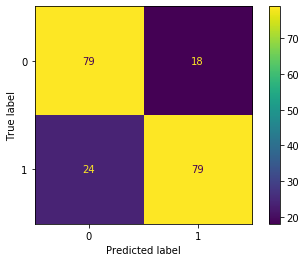

In [12]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)
plot_confusion_matrix(classifier,x_test,y_test)